### 불순도
+ 데이터 그룹 내 얼마나 다양한 객체가 있는지를 수치로 표현
+ 의사결정나무의 가지는 불순도가 낮은 방향으로 뻗어감
+ 불순도를 측정하는 지표는 CART, ID3/4.5/5, CHAID 등이 있고 각각의 알고리즘을 통해 얻을 수 있는 지표는 지니계수, 엔트로피 등이 있음

<img src='img/impurity.png'>

### 불순도 계산알고리즘 비교
+ CART : 보편적 알고리즘, 불순도 지표로 지니계수 사용, 계산속도빠름
+ ID3 : 범주형변수를 이용한 이함분류, 불순도 지표로 엔트로피 사용
    - C4.5 : 다항분류, 연속형변수를 이용한 회귀에도 사용가능
    - C5 : 저작권이 걸린 알고리즘, 앙상블트리 생성
+ CHAID : 통계적 분석 적용, 범주형변수는 카이제곱 검정을 연속형변수는 F검정을 통해 분류작업 수행


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#### 엔트로피
+ 물리 열역학에서의 관점
    - 물질의 열적 상태를 나타내는 물리량의 하나
    - 보통 무질서도라고 함
    - 엔트로피가 높으면 무질서도가 증가
+ 통계에서의 관점
    - 정보이득의 혼잡도/불순도
    - 엔트로피가 높으면 정보이해가 어려워짐
    - 즉, 정보의 불확실성을 수치로 나타낸 것
+ 학습 데이터는 기본적으로 혼잡한 상태
    - 따라서, 어떤 조건으로 분류해야만 전체 불순도가 개선되는지 계산
    - 정리한 결과에 대해 다시 계산해서 처리를 반복 적용

#### x = [1,2,3,4,5,6,7,8]
#### y = [0,0,0,1,1,1,1,1]
#### x를 기준으로 y를 나누는 가장 좋은 방법은?
+ 방법1) x = 3.5 (최적) 임계값
+ 방법2) x = 4.5 (오분류 가능성 존재)

#### 엔트로피 공식
+ $ entropy = -\sum p_k \log2 p_k $
+ 복수의 현상 n개가 존재할 때 그 불순도를 나타내는 엔트로피 식
    + -p(현상1) * log(p(현상1)) + -p(현상2) * log(p(현상2)) + ... + -p(현상n) * log(p(현상n))
+ 엔트로피는 일반적으로 2를 밑으로 하는 로그로 계산함

In [3]:
import math

#### 확률 0.1 현상이 10개 일어난 경우 엔트로피는?

In [4]:
-1 * (0.1 * math.log2(0.1)) * 10 

3.3219280948873626

#### 확률 2.5 현상이 4개 일어난 경우 엔트로피는?

In [5]:
-1 * (0.25* math.log2(0.25)) * 4

2.0

#### 3가지 특성에 따라 10마리 동물을 개/고양이로 분류

In [6]:
# sales	   outlet	users	income	year	manager
# 37.702	1,739	9.27	85.4	3.5	    9.0
# 24.196	1,224	5.86	60.7	5.0	    5.0
# 32.055	1,846	8.81	68.1	4.4	    7.0
# 3.611	    120	    3.81	20.2	4.0	    5.0
# 17.625	1,096	10.31	33.8	3.5	    7.0
# 45.919	2,290	11.62	95.1	4.1	    13.0
# 29.600	1,687	8.96	69.3	4.1	    15.0
# 8.114	    241	    6.28	16.3	5.9	    11.0
# 20.116	649	    7.77	34.9	5.5	    16.0
# 12.994	1,427	10.92	15.1	4.1	    10.0

In [7]:
# big   follow   walking      class
# yes     yes    yes          dog
# yes     yes    no           cat
# no      yes    yes          dog
# yes     yes    yes          dog
# no      no     yes          cat
# yes     no     yes          dog
# yes     no     yes          cat
# no      no     no           cat
# yes     yes    yes          dog
# no      yes    no           dog

#### 1) target 엔트로피 계산
+ 10마리 중 개는 6마리 고양이는 4마리
+ 개 확률 0.6 고양이 확률 0.4

#### (-0.6 * log2(0.6)) + (-0.4 * log2(0.4))

In [8]:
a = -0.6 * math.log2(0.6) 

In [9]:
b = -0.4 * math.log2(0.4) 

In [10]:
a+b

0.9709505944546686

#### 불순도를 낮출 수 있는 분류기준이 필요

#### 2) 덩치 big으로 분류했을 때 엔트로피 계산
+ 덩치가 클때 개로 분류될 확률 : 0.667 (4/6)
+ 덩치가 클때 고양이로 분류될 확률 : 0.333 (2/6)

In [11]:
c= - 0.667 * math.log2(0.667)

In [12]:
d= -0.333 * math.log2(0.333)

In [13]:
c+d

0.9179621399872384

#### 덩치가 작은것으로 분류 = 걔 : 고양이 2:2
+ 덩치가 작을때 개로 분류될 확률 : 0.5 (2/4)
+ 덩치가 작을때 고양이로 분류될 확률 : 0.5 (2/4)

In [14]:
e= - 0.5 * math.log2(0.5)

In [15]:
f= -0.5 * math.log2(0.5)

In [16]:
e+f

1.0

#### 정보획득
+ 불순도 지표를 구할 수 있다면, 이를 통해 어떤 질문에서 얻을 수 있는 정보획득량을 계산할 수 있음
    + 어떤 기준에 따라 분할된 데이터에서 얻을 수 있는 정보획득량 비교
+ 생성된 크기에 따라 가중치를 구하고 이를 불순도에 곱함

#### 덩치로 분류했을때의 정보획득량은 
+ 개로 분류될 확률 X 덩치로 분류했을때의 불손도와 
+ 고양이로 분류될 확률 Y 덩치로 분류했을 때 불순도를 더한 결과값

In [17]:
6/10 * 0.9179621399872384 + 4/10 * 1.0

0.9507772839923431

#### 0.951 < 0.971 로 덩치를 기준으로 분류하는 것이 일반 분류확률보다 나음

#### 따름 여부로 분류 = 걔 : 고양이 5:1
+ 잘 따를 때 개로 분류될 확률 : 5/6
+ 잘 따를 때 고양이로 분류될 확률 : 1/6
+ 잘 안 따를 때 개로 분류될 확률 : 1/4
+ 잘 안 따를 때 고양이로 분류될 확률 : 3/4

In [18]:
g= - (5/6) * math.log2(5/6)

In [19]:
h= - (1/6) * math.log2(1/6)

In [20]:
g + h

0.6500224216483541

In [21]:
j = - (1/4) * math.log2(1/4)

In [22]:
k = - (3/4) * math.log2(3/4)

In [23]:
j + k

0.8112781244591328

In [24]:
6/10 * 0.6500224216483541 + 4/10 * 0.8112781244591328

0.7145247027726656

#### 0.715 < 0.971 로 따름을 기준으로 분류하는 것이 일반 분류확률보다 나음

In [25]:
# 4) 산책walking로 분류했을때 엔트로피 계산
# 산책한다로 분류 = 개:고양이 => 5:2
# 산책하는데 개로 분류될 확률 : 5/7 = 0.714
# 산책하는데 고양이로 분류될 확률 : 2/7 = 0.286
a = -0.714 * math.log2(0.714)
b = -0.286 * math.log2(0.286)
a + b     # 0.863

0.8634979738266906

In [26]:
# 산책안한다로 분류 = 개:고양이 => 1:2
# 산책안하는데 개로 분류될 확률 : 1/3 = 0.333
# 산책안하는데 고양이로 분류될 확률 : 2/3 = 0.667
a = -0.333 * math.log2(0.333)
b = -0.667 * math.log2(0.667)
a + b    # 0.918

0.9179621399872384

In [27]:
# 산책으로 분류했을때의 정보획득량은 개로 분류될 확률 x 산책으로 분류했을때 불순도와 고양이로 분류될 확률 x 산책으로 분류했을때 불순도를 더한 결과값
6/10 * 0.863 + 4/10 * 0.918   # 0.971 -> 0.885

0.885

### 따라서, 덩치,산책,따름 여부에 따라 정보의 불순도 비교
+ 덩치 : 0.971 -> 0.951
+ 산책 : 0.971 -> 0.885
+ 따름 : 0.971 -> 0.715 (!!)

### 개/고양이 분류를 의사결정나무로 분석

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pydotplus
from sklearn import tree
import matplotlib.image as pltimg

In [29]:
# 데이터 읽어오기
catdog = pd.read_csv('csv/catdog.csv')
catdog.head()

,big,follow,walking,class
0,yes,yes,yes,dog
1,yes,yes,no,cat
2,no,yes,yes,dog
3,yes,yes,yes,dog
4,no,no,yes,cat


<AxesSubplot:xlabel='class', ylabel='count'>

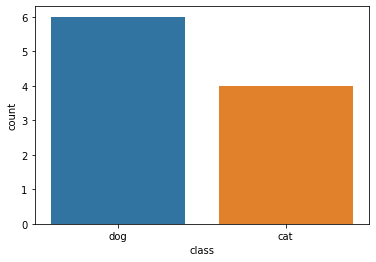

In [30]:
# 종속변수 빈도 확인
catdog['class'].value_counts()
sns.countplot(x='class', data=catdog)

In [31]:
# 전처리 - 레이블인코딩
cols = ['big','follow','walking','class']
for c in cols:
    catdog[c] = pd.Categorical(catdog[c])
    catdog[c] = catdog[c].cat.codes
catdog.head()

,big,follow,walking,class
0,1,1,1,1
1,1,1,0,0
2,0,1,1,1
3,1,1,1,1
4,0,0,1,0


In [32]:
# 데이터 분리 및 분석
data   = catdog.iloc[:, :3]
target = catdog['class']
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(data, target)
dtc.score(data, target)

0.9

In [33]:
# 분석결과 시각화
dot_data = tree.export_graphviz(dtc, out_file=None,feature_names=cols[:3],class_names=['cat', 'dog'])
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('img/catdog.png')

True

(-0.5, 710.5, 580.5, -0.5)

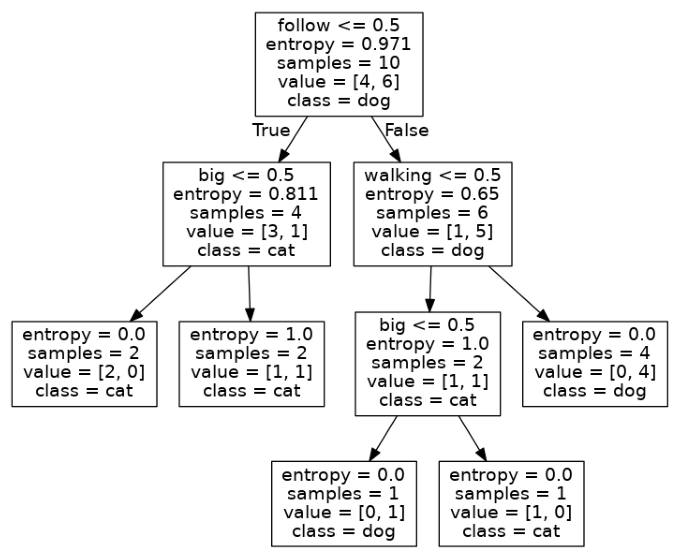

In [34]:
img = plt.imread('img/catdog.png')

plt.figure(figsize=(12,10))
plt.imshow(img)
plt.axis('off')

In [35]:
# 데이터 읽어오기
golf = pd.read_csv('csv/playgolf.csv',sep='|')
golf.head()

,OUTLOOK,TEMPERATURE,HUMIDITY,WINDY,PLAY
0,sunny,85,85,False,Don'tPlay
1,sunny,80,90,True,Don'tPlay
2,overcast,83,78,False,Play
3,rain,70,96,False,Play
4,rain,68,80,False,Play


In [36]:
golf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   OUTLOOK      14 non-null     object
 1   TEMPERATURE  14 non-null     int64 
 2   HUMIDITY     14 non-null     int64 
 3   WINDY        14 non-null     bool  
 4   PLAY         14 non-null     object
dtypes: bool(1), int64(2), object(2)
memory usage: 590.0+ bytes


In [37]:
golf['OUTLOOK'].value_counts()

sunny       5
rain        5
overcast    4
Name: OUTLOOK, dtype: int64

In [38]:
#데이터 전처리
cols = ['OUTLOOK','WINDY','TEMPERATURE','HUMIDITY','PLAY']
for c in cols:
    golf[c] = pd.Categorical(golf[c])
    golf[c] = golf[c].cat.codes
golf.head()

,OUTLOOK,TEMPERATURE,HUMIDITY,WINDY,PLAY
0,2,11,5,0,0
1,2,8,6,1,0
2,0,10,3,0,1
3,1,4,8,0,1
4,1,2,4,0,1


In [39]:
# 데이터분석
data = golf.iloc[:,:4]
target = golf.PLAY

dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(data, target)
dtc.score(data,target)

1.0

In [40]:
dot_data = tree.export_graphviz(dtc, out_file=None, feature_names=cols[:4], class_names=['no','yes'])
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('img/golf.png')

True

(-0.5, 630.5, 900.5, -0.5)

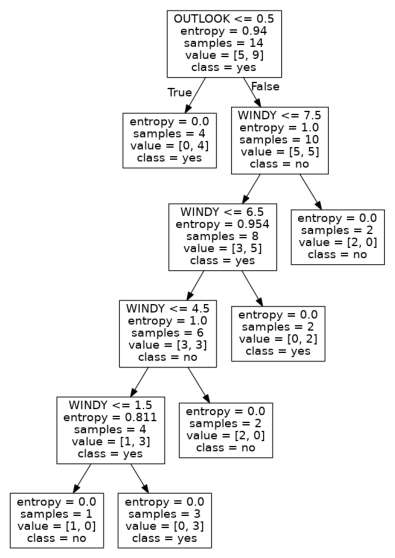

In [41]:
img = plt.imread('img/golf.png')

plt.figure(figsize=(12,10))
plt.imshow(img)
plt.axis('off')

In [42]:
# 데이터 읽어오기
golf = pd.read_csv('csv/playgolf.txt',sep=',')
golf.head()

,day,temp,outlook,humidity,windy,playGolf
0,5,hot,sunny,high,False,no
1,6,hot,sunny,high,True,no
2,7,hot,overcast,high,False,yes
3,9,cool,rain,normal,False,yes
4,10,cool,overcast,normal,True,yes


In [43]:
golf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   day       14 non-null     int64 
 1   temp      14 non-null     object
 2   outlook   14 non-null     object
 3   humidity  14 non-null     object
 4   windy     14 non-null     bool  
 5   playGolf  14 non-null     object
dtypes: bool(1), int64(1), object(4)
memory usage: 702.0+ bytes


In [44]:
#데이터 전처리
cols = ['windy','temp','outlook','humidity','playGolf']
for c in cols:
    golf[c] = pd.Categorical(golf[c])
    golf[c] = golf[c].cat.codes
golf.head()

,day,temp,outlook,humidity,windy,playGolf
0,5,1,2,0,0,0
1,6,1,2,0,1,0
2,7,1,0,0,0,1
3,9,0,1,1,0,1
4,10,0,0,1,1,1


In [45]:
# 데이터분석
data = golf.iloc[:,1:4]
target = golf.playGolf

dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(data, target)
dtc.score(data,target)

0.8571428571428571

In [46]:
dot_data1 = tree.export_graphviz(dtc, out_file=None, feature_names=cols[1:4], class_names=['no','yes'])
graph = pydotplus.graph_from_dot_data(dot_data1)
graph.write_png('img/golf2.png')

True

(-0.5, 730.5, 740.5, -0.5)

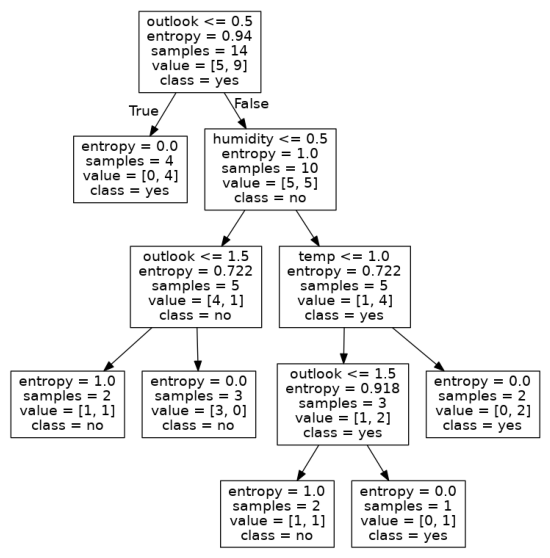

In [47]:
img = plt.imread('img/golf2.png')

plt.figure(figsize=(12,10))
plt.imshow(img)
plt.axis('off')

### 엔트로피 계산 편리하게 하기
+ entropy([이벤트수,...], 로그밑수)

In [48]:
from scipy.stats import entropy

In [50]:
# 고양이화 개로 분류될 확률 = 4 : 6
entropy([4,6], base=2)

0.9709505944546688